In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import functions as fn
import Box
import Halo
import myRCParams

In [2]:
z = 2
x_bins = np.logspace(-2, 0, 21)
m_bins = np.logspace(10.5, 13.2, 11)
k = np.logspace(-1, 2, 30)

In [3]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
m = np.sqrt(m_bins[:-1]*m_bins[1:])
logm = np.log10(m)

In [4]:
box = Box.Box(fn.box_path, fn.shot[z])

In [5]:
df = pd.read_csv(fn.here_path/'Density_Profiles'/f'zooms_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])

halo_density = np.array(df.iloc[:, 2:-1])
halo_r200c = np.array(df.iloc[:,-1])
pos = np.array([0,0,0])
halos = [Halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo in enumerate(halos):
    halo.mass = halo_mass[i]
    halo.density = halo_density[i,:]

In [6]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, x_bins, m_bins)
for i, n in enumerate(no_halos):
    print(f'{n} in {m[i]}')

0.0 in 43151907682.7765
0.0 in 80352612218.5616
0.0 in 149623565609.44327
0.0 in 278612116862.97723
0.0 in 518800038928.961
1.0 in 966050878989.8121
1.0 in 1798870915128.7837
9.0 in 3349654391578.2725
2.0 in 6237348354824.191
1.0 in 11614486138403.414


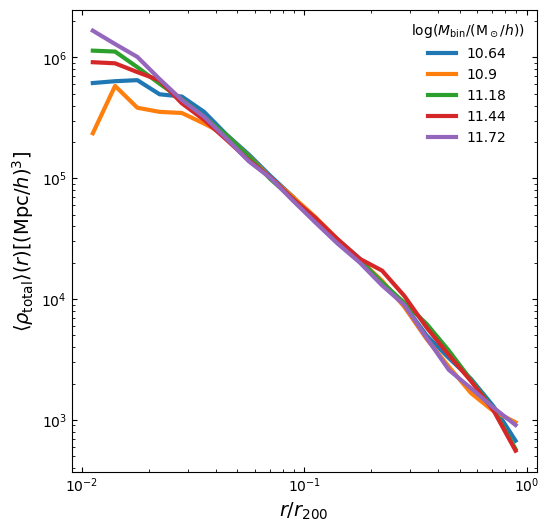

In [7]:
fg, ax = plt.subplots()
ax.loglog()
ax.set_xlabel(r'$r/r_{200}$')
ax.set_ylabel(r'$\langle\rho_\mathrm{total}\rangle(r)[(\mathrm{Mpc}/h)^3]$')
for i, halo in enumerate(avg_halos):
    ax.plot(x, halo.density, linewidth=3, label=round(logm[i],2))
ax.legend(title=r'$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [8]:
[halo.get_u(x, k) for halo in avg_halos]

[None, None, None, None, None]

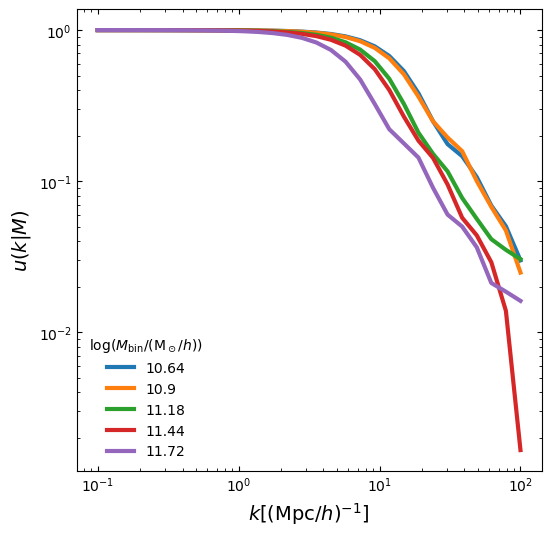

In [9]:
fg2, ax2 = plt.subplots()
ax2.loglog()
ax2.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax2.set_ylabel(r'$u(k|M)$')
for i, halo in enumerate(avg_halos):
    ax2.plot(k, halo.u, linewidth=3, label=round(logm[i],2))
ax2.legend(title=r'$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [10]:
P_1h = fn.get_power(box, avg_halos, k, m_bins, z, no_halos)

5


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array(np.histogram(mass, bins=m))


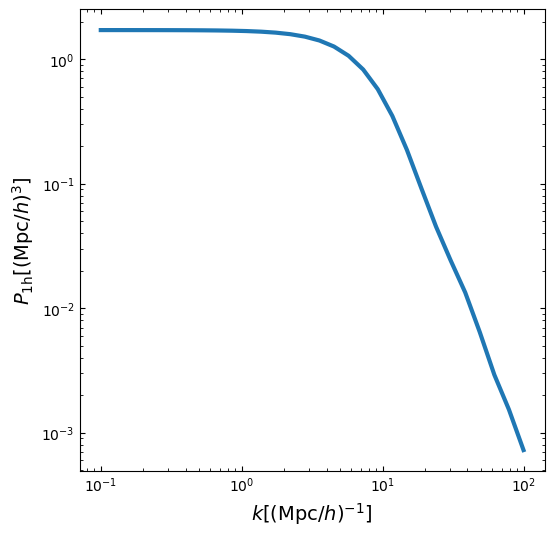

In [11]:
fg3, ax3 = plt.subplots()
ax3.loglog()
ax3.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax3.set_ylabel(r'$P_\mathrm{1h}[(\mathrm{Mpc}/h)^3]$')
ax3.plot(k, P_1h, linewidth=3)

In [12]:
with open(fn.here_path/'Power_Spectra'/f'zoom_z{z}.csv', 'w') as f:
    header = 'k, P_1h \n'
    f.write(header)
    np.savetxt(f, np.c_[k, P_1h], delimiter=',')